<a href="https://colab.research.google.com/github/JuliaSchneider01/Algo/blob/main/sorting_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook zu Blatt 8

In [8]:
!pip install numpy seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np      # um zufällige arrays zu generieren
import time             # zur zeitmessung
import seaborn as sns   # zum plotten

####  1. Implementieren Sie Selection Sort und Quicksort in Python

In [2]:
def selectionSort(array):
    # Iterate through the list
    for i in range(len(array)):
        # Find the minimum element in the unsorted sublist
        min_index = i
        for j in range(i+1, len(array)):
            if array[min_index] > array[j]:
                min_index = j
        # Swap the minimum element with the first element of the unsorted sublist
        array[i], array[min_index] = array[min_index], array[i]
    return array
    #Aufgabe3  Die Worst-Case-Eingabe ist eine Liste, die bereits in absteigender Reihenfolge sortiert ist. 
    #Es müsste jedes Element mit jedem anderen Element in der Liste verglichen werden, um das Minimum zu finden.

In [3]:
array = [7,5,8,1] 
print(selectionSort(array)) # das sortierte array

[1, 5, 7, 8]


In [4]:
def quickSort(array):
    if len(array) <= 1:
        return array
    pivot = array[len(array) // 2]
    left = [x for x in array if x < pivot]
    middle = [x for x in array if x == pivot]
    right = [x for x in array if x > pivot]
    return quickSort(left) + middle + quickSort(right)
    #Aufgabe2 das mittlere Element des Arrays wird als Pivot-Element gewählt
    #Aufgabe3 Die Worst-Case-Eingabe ist eine Liste, die bereits sortiert ist.
    # Jedes Element in der Liste wird n-1 Mal aufgerufen.

In [5]:
array = [5, 2, 9, 1, 7, 3]
sortedArray = quickSort(array)
print(sortedArray)  # [1, 2, 3, 5, 7, 9]

[1, 2, 3, 5, 7, 9]


#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen Testfällen

In [10]:
# Hier kommen die Testfälle!
#quickSort
array1 = [1,2,3,4] 
print(quickSort(array1)) # das sortierte array
array2 = [4,3,2,1] 
print(quickSort(array2))# das sortierte array
array3 = [1] 
print(quickSort(array3))# das sortierte array
array4 = [] 
print(quickSort(array4))# das sortierte array
array5 = np.random.randint(low=-100, high=100, size=10) 
print(quickSort(array5)) #das sortierte Array

#selectionSort
array1 = [1,2,3,4] 
selectionSort(array1)
print(array1) # das sortierte array
array2 = [4,3,2,1] 
selectionSort(array2)
print(array2) # das sortierte array
array3 = [1] 
selectionSort(array3)
print(array3) # das sortierte array
array4 = [] 
selectionSort(array4)
print(array4) # das sortierte array
array5 = np.random.randint(low=-100, high=100, size=10) 
print(selectionSort(array5)) #das sortierte Array

#Die Testfälle decken alle möglichen Fälle ab.
#Es wurde ein aufsteigendes und absteigendes Array getestet, also die worst case Fälle.
#Außerdem wurden noch die Fälle abgedeckt, falls ein Array nur ein Element besitzt oder leer ist, also wenn nichts sortiert werden muss.
#Mit einem random generierten Array werden noch die negativen Zahlen abgedeckt.

[1, 2, 3, 4]
[1, 2, 3, 4]
[1]
[]
[-86, -55, -52, -48, -12, 3, 28, 42, 59, 72]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1]
[]
[-38 -36  24  42  45  48  54  58  70  79]


#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [35]:
from numpy.core.arrayprint import array2string
s_times, q_times = [], []
arrar_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung für verschiedenen array-längen
for size in arrar_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    start = time.time()
    # hier sortieren mit selection sort - wie geht das?
    sorted_array = selectionSort(array)
    end = time.time()
    # Calculate the time taken to sort the array
    s_time = end - start
    s_times.append(s_time) # die zeit in sekunden
    # Sort the array using quicksort and measure the time taken
    start = time.time()
    sorted_array = quickSort(array)
    end = time.time()
    q_time = end - start
    q_times.append(q_time)

    
  

#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in Abhängigkeit von der Eingabelänge darstellt

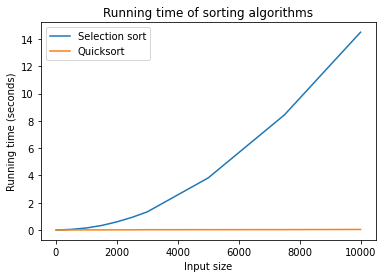

In [36]:
import matplotlib.pyplot as plt

# Plot the running times for selection sort and quicksort
plt.plot(arrar_sizes, s_times, label="Selection sort")
plt.plot(arrar_sizes, q_times, label="Quicksort")

# Add axis labels and a title
plt.xlabel("Input size")
plt.ylabel("Running time (seconds)")
plt.title("Running time of sorting algorithms")

# Add a legend
plt.legend()

# Show the plot
plt.show()

#Der Unterschied in der asymptotischen Laufzeit macht bei einer Eingabenlänge von ca. 500 bemerkbar.
#Ab da trennen sich die Kurven. Da Quicksort nur Nanosekunden benötigt, erscheint die Kurve als eine Gerade im Y-Abschnitt 0.

#### 7. Erstellen Sie für die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

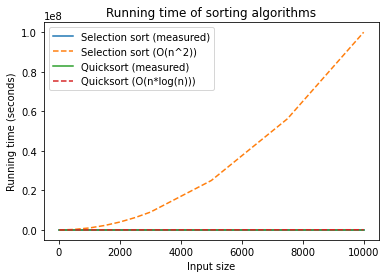

Selection sort constant (C): 1.3063329966926718e-07
Quicksort constant (C): 3.2192954926570855e-07


In [ ]:
# Hier kommen die Plots!
# Generate points for the O(n^2) curve
n_values = np.array(arrar_sizes)
o_n2_values = n_values**2

# Generate points for the O(n*log(n)) curve
o_nlog_values = n_values*np.log(n_values)

# Plot the measured running times and the asymptotic running time curves
plt.plot(arrar_sizes, s_times, label="Selection sort (measured)")
plt.plot(arrar_sizes, o_n2_values, "--", label="Selection sort (O(n^2))")
plt.plot(arrar_sizes, q_times, label="Quicksort (measured)")
plt.plot(arrar_sizes, o_nlog_values, "--", label="Quicksort (O(n*log(n)))")

# Add axis labels and a title
plt.xlabel("Input size")
plt.ylabel("Running time (seconds)")
plt.title("Running time of sorting algorithms")

# Add a legend
plt.legend()

# Show the plot
plt.show()



from scipy.optimize import curve_fit

def o_n2(n, C):
    return C*n**2

def o_nlog(n, C):
    return C*n*np.log(n)

# Fit an O(n^2) curve to the selection sort running times
params, params_covariance = curve_fit(o_n2, arrar_sizes, s_times)
print("Selection sort constant (C):", params[0])

# Fit an O(n*log(n)) curve to the quicksort running times
params, params_covariance = curve_fit(o_nlog, arrar_sizes, q_times)
print("Quicksort constant (C):", params[0])

#### 8. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion für Listen in Python

In [ ]:
# Hier kommt eure Laufzeitanalyse!
